# Task 3 - Modeling

This notebook will get you started by helping you to load the data, but then it'll be up to you to complete the task! If you need help, refer to the `modeling_walkthrough.ipynb` notebook.


## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

We want to use dataframes once again to store and manipulate the data.

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

---

## Section 2 - Data loading

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

In [ ]:
# path = "/content/drive/MyDrive/Forage - Cognizant AI Program/Task 3/Resources/"
path = "./"

sales_df = pd.read_csv(f"{path}sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
stock_df = pd.read_csv(f"{path}sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
temp_df = pd.read_csv(f"{path}sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


Now it's up to you, refer back to the steps in your strategic plan to complete this task. Good luck!

## Data Preprocessing

In [ ]:
def print_data_info(df, name):
    print(name)
    print(df.info())

In [ ]:
print_data_info(sales_df, 'sales_df')
print_data_info(stock_df, 'stock_df')
print_data_info(temp_df, 'temp_df')

sales_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB
None
stock_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2  

Because the client wants to predict hourly, we can convert our data to hour based timestamp

In [ ]:
from datetime import datetime

In [ ]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
    return dummy

In [ ]:
def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
    dummy = convert_to_datetime(data, column)
    new_ts = dummy[column].tolist()
    new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
    new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
    dummy[column] = new_ts
    return dummy

In [ ]:
sales_df = convert_timestamp_to_hourly(sales_df, 'timestamp')
stock_df = convert_timestamp_to_hourly(stock_df, 'timestamp')
temp_df = convert_timestamp_to_hourly(temp_df, 'timestamp')

In [ ]:
def print_min_max_timestamp(df, name):
    print(f"min {name} timestamp: {df['timestamp'].min()}")
    print(f"max {name} timestamp: {df['timestamp'].max()}")

In [ ]:
print_min_max_timestamp(sales_df, 'sales_df')
print_min_max_timestamp(stock_df, 'stock_df')
print_min_max_timestamp(temp_df, 'temp_df')

min sales_df timestamp: 2022-03-01 09:00:00
max sales_df timestamp: 2022-03-07 19:00:00
min stock_df timestamp: 2022-03-01 09:00:00
max stock_df timestamp: 2022-03-07 19:00:00
min temp_df timestamp: 2022-03-01 09:00:00
max temp_df timestamp: 2022-03-07 19:00:00


In [ ]:
sales_df.sort_values('timestamp').head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
1684,009810df-33e4-46bb-9f2b-7130eb555ae1,2022-03-01 09:00:00,6370633a-ac41-42a1-a29e-56c14d63786f,vegetables,gold,2.49,4,9.96,debit card
1731,25efa8ab-96b6-4d73-9381-e2a3004288af,2022-03-01 09:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,vegetables,gold,4.19,4,16.76,cash
4708,0b999ffc-fb5f-4a21-a63f-bfb409a15ad0,2022-03-01 09:00:00,b3588df6-8fea-4438-827b-ea2a01f25cb4,cheese,standard,14.99,1,14.99,debit card
5942,bf65942d-dbb5-4a34-ade1-900a1159d9a3,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,baking,non-member,5.99,3,17.97,credit card
892,2243394a-8874-4d44-814f-e6f624def421,2022-03-01 09:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,premium,0.19,1,0.19,cash


In [ ]:
stock_df.sort_values('timestamp').head()

,id,timestamp,product_id,estimated_stock_pct
11189,3880fcec-cde2-4ec0-bb1c-f9a2932b9e42,2022-03-01 09:00:00,9708cf5b-aa69-4320-a013-9d234c40e63f,0.70
820,eacf4a7f-f4f3-47ed-9512-ec4e8471b81c,2022-03-01 09:00:00,46867178-bebf-45ef-a894-5fd012d4cd4d,0.38
12027,fd493828-cbc0-4133-a608-cb8f3c30a861,2022-03-01 09:00:00,212740e6-e5ff-4aeb-9924-bccc96ba0ab1,0.74
3067,a85d392f-5c92-45de-896c-38819505bccb,2022-03-01 09:00:00,42d00f15-6ec0-48d8-9e0c-f1324dc1a4da,0.47
10215,3734694a-a376-4894-b6ea-fde98ebeb5ac,2022-03-01 09:00:00,ec4aa84b-bcb9-4b6a-b5ef-1ab2462e15a0,0.52


In [ ]:
temp_df.sort_values('timestamp').head()

,id,timestamp,temperature
11078,2b3fce24-d594-43b5-8bf1-06ce90edb3b2,2022-03-01 09:00:00,0.46
4210,0a50ad77-ed59-4744-9130-c4a7f0f408bd,2022-03-01 09:00:00,2.04
14957,f9e6046d-0b0d-4a65-bf24-c5c59ca2c92e,2022-03-01 09:00:00,-3.90
843,2c88e6da-92cf-4457-abd7-bcd5ec95dd49,2022-03-01 09:00:00,-1.63
17898,5866871c-d901-44f8-9b08-64573192c985,2022-03-01 09:00:00,-3.70


### Aggregate Data per hour

In [ ]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
temp_agg = temp_df.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()

In [ ]:
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [ ]:
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [ ]:
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


### Merge Dataset

In [ ]:
df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 423.6+ KB


In [ ]:
df = df.merge(temp_agg, on='timestamp', how='left')
df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [ ]:
df = df.merge(sales_df[['product_id', 'category', 'unit_price']], on='product_id', how='left')
df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
2,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
3,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
4,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304741 entries, 0 to 304740
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   timestamp            304741 non-null  datetime64[ns]
 1   product_id           304741 non-null  object        
 2   estimated_stock_pct  304741 non-null  float64       
 3   quantity             122526 non-null  float64       
 4   temperature          304741 non-null  float64       
 5   category             304741 non-null  object        
 6   unit_price           304741 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 18.6+ MB


We assume the null values of `quantity` caused by no transaction happen at that time, so we can fill it as 0

In [ ]:
df['quantity'] = df['quantity'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304741 entries, 0 to 304740
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   timestamp            304741 non-null  datetime64[ns]
 1   product_id           304741 non-null  object        
 2   estimated_stock_pct  304741 non-null  float64       
 3   quantity             304741 non-null  float64       
 4   temperature          304741 non-null  float64       
 5   category             304741 non-null  object        
 6   unit_price           304741 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 18.6+ MB


In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 304733
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


In [ ]:
df = df.reset_index(drop=True)
df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


## Feature Engineering

Because `product_id` act as unique representation for each timestamp like unique id we can remove this feature

In [ ]:
df.drop(columns=['product_id'], inplace=True)
df.head()

,timestamp,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,0.05,0.0,-0.02885,pets,8.19


We can dig more info on `timestamp` like the month, day of month, day of week, hour

In [ ]:
df['month'] = df['timestamp'].dt.month
df['day_of_month'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.day_of_week
df['hour'] = df['timestamp'].dt.hour

df.drop(columns=['timestamp'], inplace=True)
df.head()

,estimated_stock_pct,quantity,temperature,category,unit_price,month,day_of_month,day_of_week,hour
0,0.89,3.0,-0.02885,kitchen,11.19,3,1,1,9
1,0.14,3.0,-0.02885,vegetables,1.49,3,1,1,9
2,0.67,0.0,-0.02885,baby products,14.19,3,1,1,9
3,0.82,0.0,-0.02885,beverages,20.19,3,1,1,9
4,0.05,0.0,-0.02885,pets,8.19,3,1,1,9


Convert categorical column `category` to numeric, but because each value in `category` doesn't have orders or levels, they are on same level, we can transform it in one hot encoding behavior

In [ ]:
df = pd.get_dummies(df, columns=['category'])
df.head()

,estimated_stock_pct,quantity,temperature,unit_price,month,day_of_month,day_of_week,hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,3,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,3,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.02885,14.19,3,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.02885,20.19,3,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.02885,8.19,3,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.shape

(10845, 30)

In this case the model are going to predict `estimated_stock_pct` based on features

In [ ]:
X = df.drop(columns=['estimated_stock_pct'])
y = df['estimated_stock_pct']

print(X.shape)
print(y.shape)

(10845, 29)
(10845,)


In [ ]:
df.to_csv('merged_stock_levels.csv', index=False)

## Model

Since this is regression problem, we'll try use `RandomForestRegressor` which is a powerful tree based ensemble algorithm and the results are interpretable

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

Config `K` fold cross validation, `split` train test size

In [ ]:
K = 10
split = 0.6

In [ ]:
maes = []

for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  maes.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(maes) / len(maes)):.2f}")


Fold 1: MAE = 0.236
Fold 2: MAE = 0.234
Fold 3: MAE = 0.235
Fold 4: MAE = 0.241
Fold 5: MAE = 0.236
Fold 6: MAE = 0.238
Fold 7: MAE = 0.233
Fold 8: MAE = 0.236
Fold 9: MAE = 0.235
Fold 10: MAE = 0.234
Average MAE: 0.24


## Evaluation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

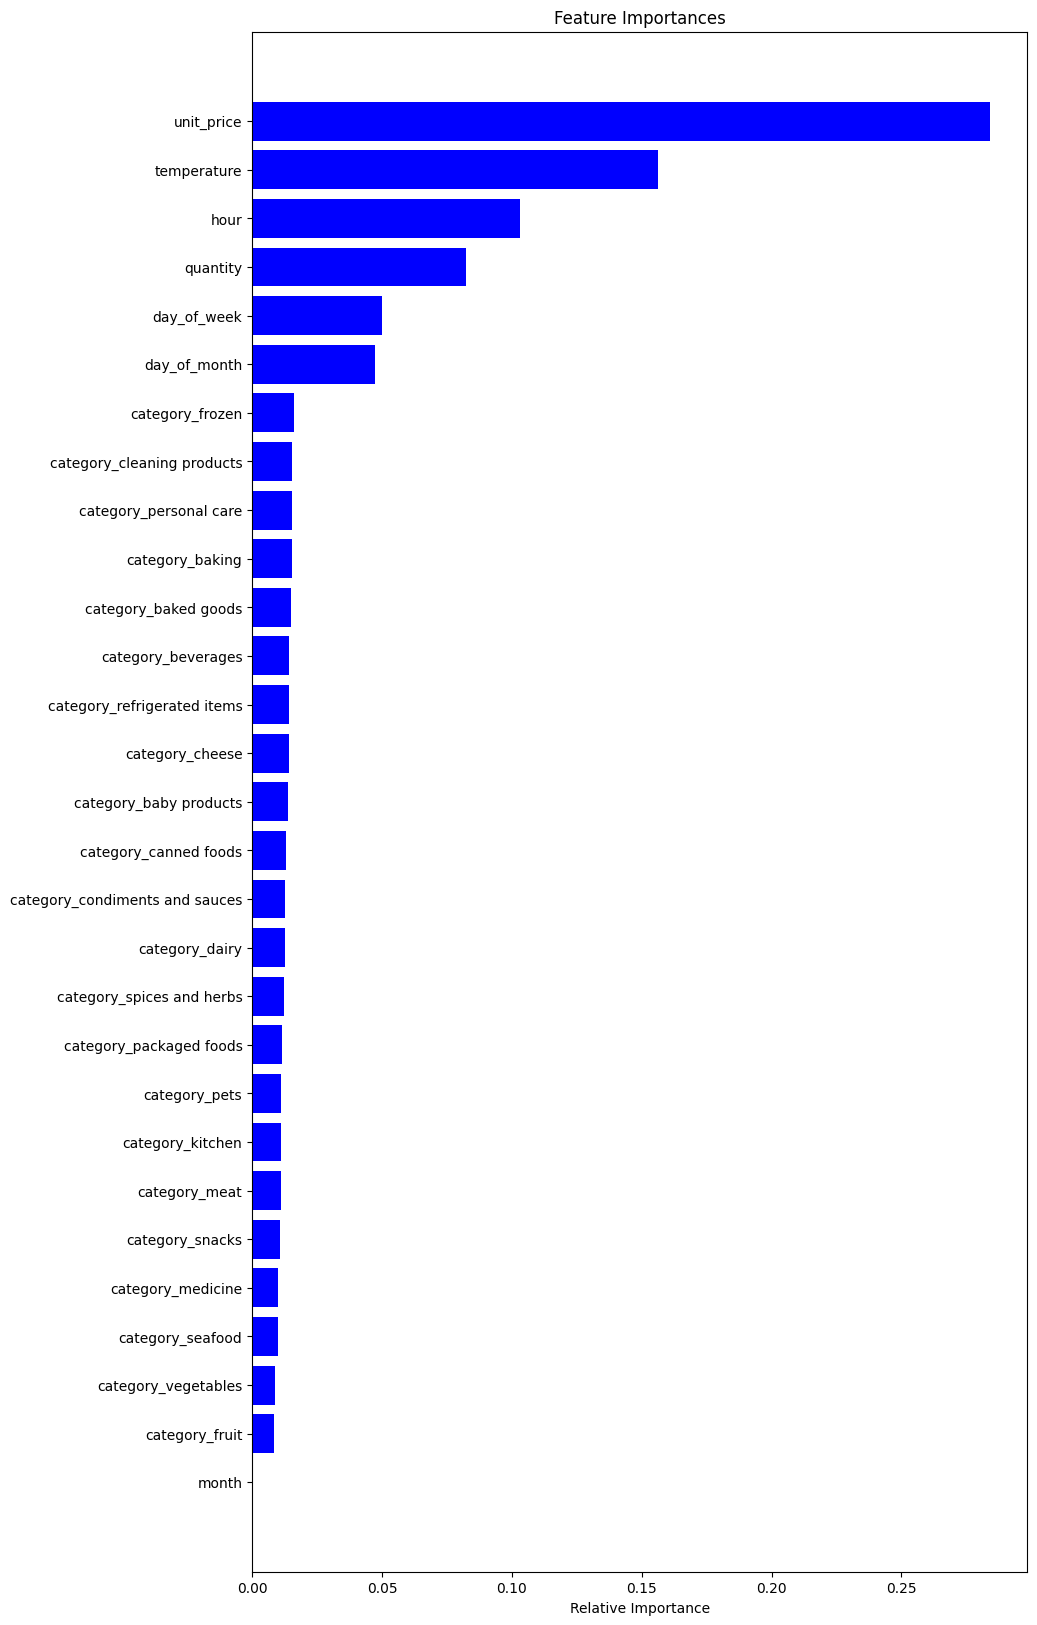

In [ ]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From this evaluation
*   `unit_price` seems to be the most important in prediction stock levels
*   `temperature`, and `hour` also important in prediction stock levels

